In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
housing_pd = pd.read_csv('/content/drive/MyDrive/Datasets/California housing.csv')

In [4]:
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_pd['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing_pd.shape

(20640, 10)

In [7]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd),random_state=1)
housing_pd_shuffled.shape

(20640, 10)

In [8]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [9]:
housing_pd_shuffled.drop('ocean_proximity',axis = 1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [10]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity',axis = 1), pd.get_dummies(housing_pd_shuffled['ocean_proximity'])],axis = 1)
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [11]:
housing_pd_final.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN'],
      dtype='object')

In [12]:
housing_pd_final = housing_pd_final[['longitude','latitude',
                                      'housing_median_age', 'total_rooms',
                                      'total_bedrooms', 'population',
                                      'households', 'median_income',
                                      '<1H OCEAN','INLAND',
                                      'ISLAND','NEAR BAY',
                                      'NEAR OCEAN', 'median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [13]:
housing_pd_final = housing_pd_final.dropna()
housing_pd_final.shape

(20433, 14)

In [14]:
train_pd, test_pd , val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)


(18000, 1217, 1218)

In [15]:
X_train , y_train = train_pd.to_numpy()[:,:-1], train_pd.to_numpy()[:,-1]
print("X train",X_train)
print("*"*30)
print("y_train",y_train)

X train [[-118.36   34.06   39.   ...    0.      0.      0.  ]
 [-119.78   36.78   37.   ...    0.      0.      0.  ]
 [-122.42   37.73   46.   ...    0.      1.      0.  ]
 ...
 [-118.38   34.07   21.   ...    0.      0.      0.  ]
 [-117.31   34.07   40.   ...    0.      0.      0.  ]
 [-117.72   33.62   21.   ...    0.      0.      0.  ]]
******************************
y_train [355000.  70700. 229400. ... 500001.  70900. 110000.]


In [16]:
X_train.shape

(18000, 13)

In [17]:
y_train.shape

(18000,)

In [18]:
X_val , y_val = val_pd.to_numpy()[:,:-1], val_pd.to_numpy()[:,-1]
print("X_val",X_val)
print("*"*30)
print("y_val",y_val)

X_val [[-121.94   37.56   15.   ...    0.      0.      0.  ]
 [-122.58   38.12   13.   ...    0.      1.      0.  ]
 [-118.54   34.18   25.   ...    0.      0.      0.  ]
 ...
 [-118.26   33.93   42.   ...    0.      0.      0.  ]
 [-117.16   33.73   10.   ...    0.      0.      0.  ]
 [-122.2    37.79   35.   ...    0.      1.      0.  ]]
******************************
y_val [442900. 309500. 240300. ... 104800. 140700. 126000.]


In [19]:
X_val.shape

(1218, 13)

In [20]:
y_val.shape

(1218,)

In [21]:
X_test , y_test = test_pd.to_numpy()[:,:-1], test_pd.to_numpy()[:,-1]
print("X_test",X_test)
print("*"*30)
print("y_test",y_test)

X_test [[-121.99   37.26   17.   ...    0.      0.      0.  ]
 [-116.92   32.82   16.   ...    0.      0.      0.  ]
 [-117.65   34.08   38.   ...    0.      0.      0.  ]
 ...
 [-121.8    37.32   14.   ...    0.      0.      0.  ]
 [-121.94   37.56   15.   ...    0.      0.      0.  ]
 [-122.58   38.12   13.   ...    0.      1.      0.  ]]
******************************
y_test [442500. 184600. 144900. ... 227600. 442900. 309500.]


In [22]:
X_test.shape

(1217, 13)

In [23]:
y_test.shape

(1217,)

In [24]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(18000, 13) (18000,) (1218, 13) (1218,) (1217, 13) (1217,)


In [25]:
housing_pd_final.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,0.442128,0.317917,0.000245,0.111095,0.128615,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,0.496652,0.465678,0.015641,0.314257,0.334782,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,0.000000,0.000000,0.000000,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,0.000000,0.000000,0.000000,0.000000,0.000000,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,0.000000,0.000000,0.000000,0.000000,0.000000,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,1.000000,1.000000,0.000000,0.000000,0.000000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,1.000000,1.000000,1.000000,1.000000,1.000000,500001.000000


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler().fit(X_train[:,:8])


In [28]:
def preprocesser(X):
  A = np.copy(X)
  A[:,:8] = scaler.transform(A[:,:8])
  return A

X_train_preprocessed = preprocesser(X_train)
X_train_preprocessed

array([[ 0.60344338, -0.73607301,  0.82084451, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10512186,  0.53710782,  0.66177382, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42245442,  0.98178495,  1.37759191, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.59346359, -0.7313922 , -0.61079167, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12738246, -0.7313922 ,  0.90037985, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92279673, -0.94202873, -0.61079167, ...,  0.        ,
         0.        ,  0.        ]])

In [29]:
pd.DataFrame(X_train_preprocessed)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.728191,-0.815647,0.423168,-0.057912,0.134325,0.111802,0.120643,-0.349320,1.0,0.0,0.0,0.0,0.0
17996,-0.459404,0.785191,1.298057,-0.368023,-0.277849,-0.015390,-0.241986,-0.956265,0.0,1.0,0.0,0.0,0.0
17997,0.593464,-0.731392,-0.610792,0.468908,0.996794,0.077354,1.027213,-0.165155,1.0,0.0,0.0,0.0,0.0
17998,1.127382,-0.731392,0.900380,0.139013,0.463112,0.531359,0.464877,-0.923784,0.0,1.0,0.0,0.0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f82a20045d0>,
      dtype=object)

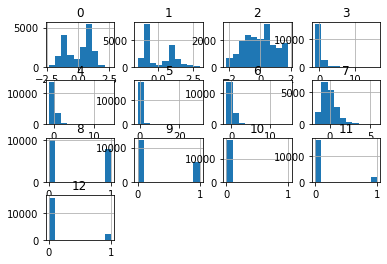

In [30]:
pd.DataFrame(X_train_preprocessed).hist()

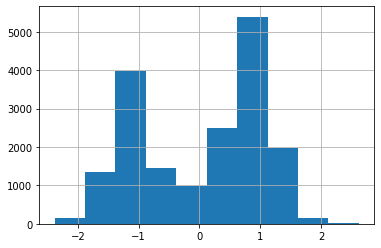

In [31]:
pd.DataFrame(X_train_preprocessed)[0].hist()

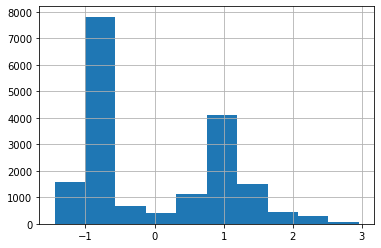

In [32]:
pd.DataFrame(X_train_preprocessed)[1].hist()

In [33]:
X_train, X_val, X_test = preprocesser(X_train),preprocesser(X_val),preprocesser(X_test)

In [34]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [36]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train,y_train)
mse(lm.predict(X_train),y_train, squared=False),mse(lm.predict(X_val),y_val,squared =False)

(68593.05578127236, 71382.43558330165)

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors =1).fit(X_train,y_train)
mse(knn.predict(X_train),y_train, squared=False),mse(knn.predict(X_val),y_val,squared =False)

(0.0, 74402.39127518912)

In [39]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors =2).fit(X_train,y_train)
mse(knn.predict(X_train),y_train, squared=False),mse(knn.predict(X_val),y_val,squared =False)

(36947.61009305045, 67505.87884753625)

In [40]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors =3).fit(X_train,y_train)
mse(knn.predict(X_train),y_train, squared=False),mse(knn.predict(X_val),y_val,squared =False)

(43964.27989191732, 65817.16818515355)

In [41]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors =7).fit(X_train,y_train)
mse(knn.predict(X_train),y_train, squared=False),mse(knn.predict(X_val),y_val,squared =False)

(51713.4759100337, 62283.64593351173)

In [42]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors =10).fit(X_train,y_train)
mse(knn.predict(X_train),y_train, squared=False),mse(knn.predict(X_val),y_val,squared =False)

(53759.09908812057, 62161.22860469906)

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=2).fit(X_train,y_train)
mse(rfr.predict(X_train),y_train, squared=False),mse(rfr.predict(X_val),y_val,squared =False)

(80571.65526141145, 80958.15851414074)

In [44]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=4).fit(X_train,y_train)
mse(rfr.predict(X_train),y_train, squared=False),mse(rfr.predict(X_val),y_val,squared =False)

(70608.79565456192, 72673.17532425286)

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=6).fit(X_train,y_train)
mse(rfr.predict(X_train),y_train, squared=False),mse(rfr.predict(X_val),y_val,squared =False)

(61911.60589467804, 65133.18719588991)

In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=8).fit(X_train,y_train)
mse(rfr.predict(X_train),y_train, squared=False),mse(rfr.predict(X_val),y_val,squared =False)

(52585.206861113365, 57677.74386082611)

In [47]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=10).fit(X_train,y_train)
mse(rfr.predict(X_train),y_train, squared=False),mse(rfr.predict(X_val),y_val,squared =False)

(43546.22389626592, 53347.18550466719)

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=10).fit(X_train,y_train)
mse(gbr.predict(X_train),y_train, squared=False),mse(gbr.predict(X_val),y_val,squared =False)

(79280.92646412864, 80346.8715038209)

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=60).fit(X_train,y_train)
mse(gbr.predict(X_train),y_train, squared=False),mse(gbr.predict(X_val),y_val,squared =False)

(58218.92446637415, 61380.84093610265)

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100).fit(X_train,y_train)
mse(gbr.predict(X_train),y_train, squared=False),mse(gbr.predict(X_val),y_val,squared =False)

(53442.13428693658, 56878.93677453873)

In [51]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=170).fit(X_train,y_train)
mse(gbr.predict(X_train),y_train, squared=False),mse(gbr.predict(X_val),y_val,squared =False)

(49806.97204725272, 53330.596256133)

In [52]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train,y_train)
mse(gbr.predict(X_train),y_train, squared=False),mse(gbr.predict(X_val),y_val,squared =False)

(47274.82259072158, 51378.21241480817)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2,'relu'))
simple_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate=0.1)
cp = ModelCheckpoint('models/simple_nn',save_best_only=True)
simple_nn.compile(optimizer = opt,loss='mse',metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data =(X_val,y_val), callbacks=[cp],epochs=100)


Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 50715947008.0000 - root_mean_squared_error: 225202.0156 - val_loss: 41321734144.0000 - val_root_mean_squared_error: 203277.4844
INFO:tensorflow:Assets written to: models/simple_nn/assets
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 31118569472.0000 - root_mean_squared_error: 176404.5625 - val_loss: 23817852928.0000 - val_root_mean_squared_error: 154330.3438
INFO:tensorflow:Assets written to: models/simple_nn/assets
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 18897954816.0000 - root_mean_squared_error: 137469.8281 - val_loss: 13559009280.0000 - val_root_mean_squared_error: 116443.1562
INFO:tensorflow:Assets written to: models/simple_nn/assets
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 8699111424.0000 - root_mean_squared_error: 93269.0234 - val_loss: 5562931200.0000 - val_root_mean_squared_error: 74585.0625
INFO:tensorflow

In [57]:
from tensorflow.keras.models import load_model
simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train),y_train, squared=False),mse(simple_nn.predict(X_val),y_val,squared =False)

(65877.53407969384, 68496.13902276034)

In [59]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32,'relu'))
medium_nn.add(Dense(16,'relu'))
medium_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate=0.1)
cp = ModelCheckpoint('models/medium_nn',save_best_only=True)
medium_nn.compile(optimizer = opt,loss='mse',metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data =(X_val,y_val), callbacks=[cp],epochs=100)

Epoch 1/100
563/563 [==============================] - 1s 2ms/step - loss: 8675752960.0000 - root_mean_squared_error: 93143.7188 - val_loss: 5266280448.0000 - val_root_mean_squared_error: 72569.1406
INFO:tensorflow:Assets written to: models/medium_nn/assets
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 4493506560.0000 - root_mean_squared_error: 67033.6250 - val_loss: 4759848960.0000 - val_root_mean_squared_error: 68991.6562
INFO:tensorflow:Assets written to: models/medium_nn/assets
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 4366689280.0000 - root_mean_squared_error: 66080.9297 - val_loss: 4694831104.0000 - val_root_mean_squared_error: 68518.8359
INFO:tensorflow:Assets written to: models/medium_nn/assets
Epoch 4/100
563/563 [==============================] - 1s 1ms/step - loss: 4311249408.0000 - root_mean_squared_error: 65660.1016 - val_loss: 4791547904.0000 - val_root_mean_squared_error: 69221.0078
Epoch 5/100
563/563 [======

In [60]:
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train),y_train, squared=False),mse(medium_nn.predict(X_val),y_val,squared =False)

(51890.27452099909, 56558.41745439407)

In [61]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256,'relu'))
large_nn.add(Dense(128,'relu'))
large_nn.add(Dense(64,'relu'))
large_nn.add(Dense(32,'relu'))
large_nn.add(Dense(1,'linear'))

opt = Adam(learning_rate=0.1)
cp = ModelCheckpoint('models/large_nn',save_best_only=True)
large_nn.compile(optimizer = opt,loss='mse',metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data =(X_val,y_val), callbacks=[cp],epochs=100)

Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 6675922432.0000 - root_mean_squared_error: 81706.3203 - val_loss: 5408464896.0000 - val_root_mean_squared_error: 73542.2656
INFO:tensorflow:Assets written to: models/large_nn/assets
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 4809247744.0000 - root_mean_squared_error: 69348.7422 - val_loss: 4329794560.0000 - val_root_mean_squared_error: 65801.1719
INFO:tensorflow:Assets written to: models/large_nn/assets
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 3978686976.0000 - root_mean_squared_error: 63076.8320 - val_loss: 4080255488.0000 - val_root_mean_squared_error: 63876.8789
INFO:tensorflow:Assets written to: models/large_nn/assets
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 4008180480.0000 - root_mean_squared_error: 63310.1914 - val_loss: 4290399744.0000 - val_root_mean_squared_error: 65501.1445
Epoch 5/100
563/563 [=========

In [62]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train),y_train, squared=False),mse(large_nn.predict(X_val),y_val,squared =False)

(45921.266349237936, 53563.94993505451)

In [63]:
mse(gbr.predict(X_test),y_test, squared=False)

49305.8574865452